In [3]:
import os 
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd


def Size(im):
    image=Image.open(pathname+"/"+im)
    team_size=image.size[0]
    return team_size

def listdir_nohidden1(path):
    for f in os.listdir(path):
        if not f.startswith('.'):
            yield f

In [37]:
#1935
pathname = r'C:/Users/Keitaro Ninomiya/Box/Research Notes (keitaro2@illinois.edu)/Tokyo_Jobs/Raw_Data/1935/Departments'
dta35=pd.read_csv(pathname+"/Data.csv")
#1937
pathname = r'C:/Users/Keitaro Ninomiya/Box/Research Notes (keitaro2@illinois.edu)/Tokyo_Jobs/Raw_Data/1937/Departments'
dta37=pd.read_csv(pathname+"/Data.csv")

dta=pd.concat([dta35,dta37])

AttributeError: 'numpy.ndarray' object has no attribute 'save'

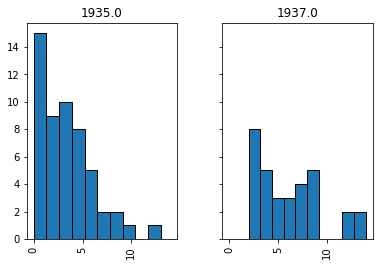

In [48]:
dta['Female'].hist(by=dta['Year'], edgecolor='black', sharey=True, sharex=True)

array([<AxesSubplot:title={'center':'1935.0'}>,
       <AxesSubplot:title={'center':'1937.0'}>], dtype=object)

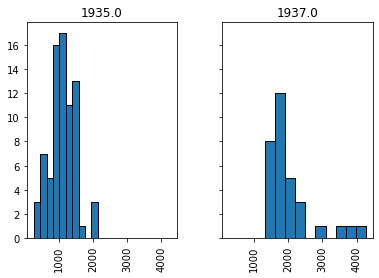

In [39]:
dta['Size'].hist(by=dta['Year'], edgecolor='black', sharey=True, sharex=True)

In [47]:
dta = dta[dta['Dept_name'].notna()]
dtaLong=dta.pivot(index='Dept_name',columns='Year', values='Female')
dtaLong

Year,NaN,1935.0,1937.0
Dept_name,,,
〇下谷區役所,NaN,2.0,7.0
〇世田谷區役所,NaN,1.0,7.0
〇中野區役所,NaN,3.0,4.0
〇京橋區役所,NaN,3.0,4.0
〇向島區役所,NaN,5.0,4.0
〇品川區役所,NaN,10.0,12.0
〇四谷區役所,NaN,6.0,8.0
〇城東區役所,NaN,5.0,8.0
〇城東病院,NaN,5.0,NaN


In [100]:

    im=sorted(listdir_nohidden1(pathname))[i]
    image=cv2.imread(pathname+"/"+im)

    #Detecting circles
    cropped_image = image[0:100, image.shape[1]-100:image.shape[1]]

    # Detecting circles: This step is heavily refering to the following website https://www.geeksforgeeks.org/circle-detection-using-opencv-python/
    # Convert to grayscale.
    gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
    # Blur using 3 * 3 kernel.
    gray_blurred = cv2.blur(gray, (3, 3))  

    # Apply Hough transform on the blurred image.
    detected_circles = cv2.HoughCircles(gray_blurred, 
                       cv2.HOUGH_GRADIENT, 1, 150, param1 = 50,
                   param2 = 15, minRadius = 8, maxRadius = 12)
    detected_circles = np.uint16(np.around(detected_circles))

    cropped_image = image[0:300, image.shape[1]-30:image.shape[1]]
    img = Image.fromarray(cropped_image)
    text = pytesseract.image_to_string(img,lang='jpn_vert')

    print(text)

本で〇品川莉役所 aeon-noxtoo



In [102]:
text

'本で〇品川莉役所 aeon-noxtoo\n'

In [31]:
pathname = r'C:/Users/Keitaro Ninomiya/Box/Research Notes (keitaro2@illinois.edu)/Tokyo_Jobs/Raw_Data/1935/Departments'
for i in range(0,len(sorted(listdir_nohidden1(pathname)))):
    try:
        im=sorted(listdir_nohidden1(pathname))[i]
        image=cv2.imread(pathname+"/"+im)
        cropped_image = image[0:200, image.shape[1]-30:image.shape[1]]
        img = Image.fromarray(cropped_image)
        img.save(r'C:/Users/Keitaro Ninomiya/Desktop/test/'+im+'.png')
        i=i+1
    except:
        i=i+1

In [51]:
pathname=r'C:/Users/Keitaro Ninomiya/Desktop/test'
allfiles = os.listdir(pathname)
for i in range(0,len(allfiles)):    
    imlist =[cv2.imread(pathname+"/"+filename) for filename in np.flip(allfiles) if filename[-4:] in [".png"]]
    im = np.hstack(imlist)
    Image.fromarray(im).save(r'C:/Users/Keitaro Ninomiya/Desktop/test/Aggregate.png')

In [50]:
len(allfiles)

53